### RQ3 : Microtask learning increases classification speed
####  Null hypothesis: There is no difference in {learning, motivation, classification accruacy} between Group A and Group B

In [41]:
%pylab inline
import pandas as pd 
import fnmatch
import scipy.stats as stats
import os
from collections import Counter
from  stats_helper import *

Populating the interactive namespace from numpy and matplotlib


In [42]:
users = pd.read_csv("Crowdclass_Data.csv")
dataA = users[users["Group"]=="A"]
dataB = users[users["Group"]=="B"]

# Using speed computed by $N_{classified}/t_{total}$

In [45]:
usersA  =pd.read_csv("../zooniverse/scripts/analysis/user_summary_statistics.csv")
usersB  =pd.read_csv("../crowdclass/scripts/analysis/user_summary_statistics.csv")
good_Users_A = [2638,3957,1055,2506,7791,5872,7452,6082,9727,7339,8049,48427,54352,24066,90272,4315,38914,4332,9365,2335,5028,18887,30558,5817,7669,29984,2626,7620,8146,2006,9815,4056,9359,2117,4074,27757,6900,4991,905944,751312,515490,485687,389806,177353,9314530,4697455]
dataA = usersA.loc[usersA['ID'].isin(good_Users_A)]
good_Users_B = [6351,1,3150,3047,8408,9595,5934,2141,2271,3757,5530,8262,4166,7324,8349,4067,2025,14764,53473,14171,81398,7464,7093,3291,8358,3859,4939,5599,3850,950726,926578,917524,760806,597906,590162,427414,358949,233442,118521]
dataB = usersB.loc[usersB['ID'].isin(good_Users_B)]

In [46]:
A = np.array(dataA["avrg_speed"])*60 #img_classified / minute
B = np.array(dataB["avrg_speed"])*60 

In [47]:
basic_stats(A,B)

A: mu = 1.759; std = 0.813
B: mu = 2.644; std = 2.134


In [48]:
# plt.figure()
# plt.hist(A,label="A",alpha=0.5)
# plt.hist(B,label="B",alpha=0.5)
# plt.legend()

The overall speed for the participants is about the same. 

In [96]:
def single_bar_chart(dataA,dataB, N=1,width=0.3,title=""):
    AMeans = mean(dataA)
    BMeans = mean(dataB)
    # Astd = [std(dataA), std(A_posttest_score)]
    # Bstd =[std(dataB), std(B_posttest_score)]
    A_yerr = np.array(stats.t.interval(0.95,len(dataA)-1,loc = mean(dataA), scale=stats.sem(dataA))- mean(dataA))
    B_yerr = np.array(stats.t.interval(0.95,len(dataB)-1,loc = mean(dataB), scale=stats.sem(dataB))- mean(dataB))
    ind = np.arange(N)  # the x locations for the groups
    ax = plt.subplot(121)
    rects1 = ax.bar(ind, mean(dataA), width=width, color='r',ecolor= "black",yerr = A_yerr[0])
    rects2 = ax.bar( ind+width, mean(dataB), width=width, color='b',ecolor= "black",yerr = B_yerr[0])

    # add some text for labels, title and axes ticks
#     ax.set_ylabel('Rate [images/min]',fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.set_xticks([width])
    ax.set_xticklabels((''),fontsize=14)
    ax.set_yticklabels(np.arange(0,3.6,0.5),fontsize=13)
    ax.legend((rects1[0], rects2[0]), ('A', 'B'),"upper left")
    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                    '%.2f' % float(height),
                    ha='center', va='bottom',color="white",fontsize=15)

    autolabel(rects1)
    autolabel(rects2)
    print AMeans, BMeans, A_yerr,B_yerr

1.75919021621 2.6444500171 [-0.24  0.24] [-0.7  0.7]


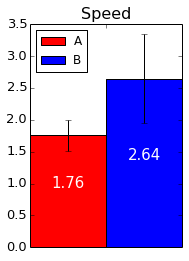

In [97]:
single_bar_chart(A,B,width=0.1,title="Speed")

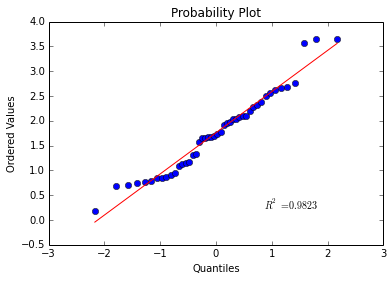

In [51]:
plt.figure()
plt1 = stats.probplot(A, dist="norm", plot=pylab)

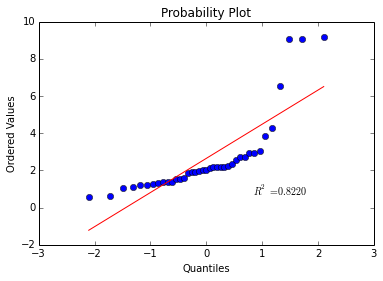

In [52]:
plt2 = stats.probplot(B, dist="norm", plot=pylab)

In [53]:
run_all_non_parametric_analysis(A,B)

---------------------------------------------------------------------------------

Median
A:  1.71455153034
B:  2.01066260472
A < B
------
A: mu = 1.759; std = 0.813
B: mu = 2.644; std = 2.134
A : W = 0.96 ; p =0.124802418053 ---> Normal
B : W = 0.68 ; p =6.09086754366e-08 ---> NOT Normal
	Wilcoxon rank sum test

data:  GroupA and GroupB

W = 683, p-value = 0.05946

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.204706426521 -----> Small
Z = -1.8873, p-value = 0.05946

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 38.34783

Mean ranks of group
[1] 48.48718



- multiselect problem harder cognitively than T/F questions 
- that might also explain why they classify worse in accuracy 

do the weighted analysis, see if people in group A struggled more with the odd/merger/dustalne type question ? 


# Content dt 

- Okay right, the two groups are about the same within the questions,  but how long does it take the users to read the content? Remember this is overhead for Crowdclass which doesn't even exist in GZ 

In [54]:
content_dt_headers = fnmatch.filter(list(usersB.columns),"content_dt*")

In [55]:
content_dt = usersB[content_dt_headers].dropna()

In [56]:
avrg_content_time = []
for i in content_dt.iterrows():
    arr = np.array(i[1][nonzero(i[1])[0]])
    if arr!=[]:
        avrg_content_time.append(np.mean(arr))

(array([ 16.,  32.,  10.,   5.,   2.,   1.,   1.,   2.,   1.,   1.]),
 array([  1.73,   7.18,  12.63,  18.07,  23.52,  28.96,  34.41,  39.86,
         45.3 ,  50.75,  56.19]),
 <a list of 10 Patch objects>)

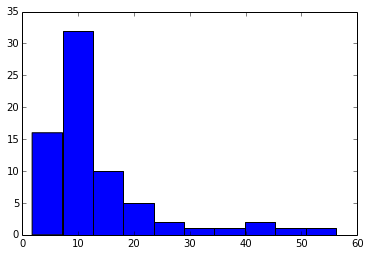

In [57]:
plt.hist(avrg_content_time)

In [58]:
shapiro_wilks(avrg_content_time,"Content")

Content : W = 0.73 ; p =4.10585093702e-10 ---> NOT Normal


In [59]:
basic_stats(avrg_content_time,"",mode="single")

A: mu = 13.124; std = 10.637
